In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D

In [2]:
#File importation
str0="ts_L60_Z12_A500_DX50_bias5_N10000"
fnamex ="DATA/x_" + str0 + ".csv"
fnamey ="DATA/y_" + str0 + ".csv"

x = np.loadtxt(fnamex,delimiter=',',dtype=float)
N = len(x)
print('Length of x = ',N)



categ = np.loadtxt(fnamey,delimiter=',', dtype=int)
#Number of categories
N_categ = 3
y = np.zeros((N,N_categ))

for n in range(N):
    y[n][categ[n]] = 1
    
print(y[0])



Length of x =  10000
[1. 0. 0.]


In [3]:
#We saw that the nn was not converging and it might be
#due to some average, so we are going to remove it

xm = x.mean(axis=1)
for n in range(N):
    x[n] = x[n]-xm[n]
    
std = x.std(axis=1)
for n in range(N):
    x[n] = x[n] / std[n]  

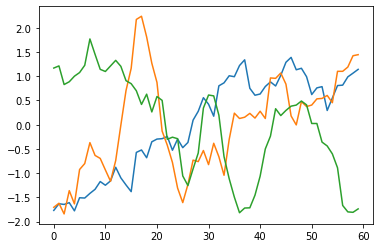

In [4]:
#Data visualization
plt.plot(x[0])
plt.plot(x[1])
plt.plot(x[2])
plt.show()

In [5]:
#We asign the data for training and test
perc_train = 0.8
N_train = int(N * perc_train)
N_val = N-N_train

x_train = x[:N_train]
y_train = y[:N_train]

x_val = x[N_train:]
y_val = y[N_train:]

L =len(x[0])

print('Number of samples',N)
print('Training samples',N_train)
print('Validation samples',N_val)
print('Length of x[0]',L)

Number of samples 10000
Training samples 8000
Validation samples 2000
Length of x[0] 60


In [6]:
x_train = x_train.reshape(x_train.shape[0],L,1)
x_val = x_val.reshape(x_val.shape[0],L,1)
input_shape = (L,1)

In [7]:
from keras import initializers,regularizers
np.random.seed(12345)

#We use l1 for Lazzo regularization
reg = regularizers.l1(0.01)    

#Now we initialize the NN weights
ini = initializers.RandomNormal(mean=0,stddev=0.05)

model = Sequential()
model.add(Conv1D(filters =5, kernel_size =11, 
                 kernel_regularizer = reg,
                 kernel_initializer = ini,
                 activation = 'relu',
                 input_shape =input_shape))

model.add(AveragePooling1D(5))
model.add(Conv1D(filters=5,kernel_size=7,activation="relu"))
model.add(Flatten())
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(N_categ,activation='softmax'))

print(model.summary())

from keras import optimizers

opt =optimizers.Adam()
#opt = optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov= True)

model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=opt,metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d (AveragePo (None, 10, 5)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 4, 5)              180       
_________________________________________________________________
flatten (Flatten)            (None, 20)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                210       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 3

In [8]:
batch_size =250
epochs = 300

fit = model.fit(x_train,y_train,
               batch_size=batch_size,
               epochs = epochs,
               validation_data =(x_val,y_val),
               verbose=2, shuffle=True)

Epoch 1/300
32/32 - 1s - loss: 1.1129 - accuracy: 0.3491 - val_loss: 1.1055 - val_accuracy: 0.3675
Epoch 2/300
32/32 - 1s - loss: 1.1020 - accuracy: 0.3720 - val_loss: 1.0975 - val_accuracy: 0.3990
Epoch 3/300
32/32 - 1s - loss: 1.0937 - accuracy: 0.4212 - val_loss: 1.0865 - val_accuracy: 0.4470
Epoch 4/300
32/32 - 1s - loss: 1.0796 - accuracy: 0.4500 - val_loss: 1.0658 - val_accuracy: 0.4740
Epoch 5/300
32/32 - 1s - loss: 1.0602 - accuracy: 0.4640 - val_loss: 1.0359 - val_accuracy: 0.4800
Epoch 6/300
32/32 - 1s - loss: 1.0296 - accuracy: 0.4789 - val_loss: 0.9995 - val_accuracy: 0.5030
Epoch 7/300
32/32 - 1s - loss: 1.0054 - accuracy: 0.4958 - val_loss: 0.9732 - val_accuracy: 0.5180
Epoch 8/300
32/32 - 1s - loss: 0.9795 - accuracy: 0.5113 - val_loss: 0.9486 - val_accuracy: 0.5265
Epoch 9/300
32/32 - 1s - loss: 0.9658 - accuracy: 0.5153 - val_loss: 0.9364 - val_accuracy: 0.5335
Epoch 10/300
32/32 - 1s - loss: 0.9490 - accuracy: 0.5245 - val_loss: 0.9231 - val_accuracy: 0.5410
Epoch 11/

32/32 - 1s - loss: 0.7451 - accuracy: 0.6909 - val_loss: 0.7337 - val_accuracy: 0.6945
Epoch 84/300
32/32 - 1s - loss: 0.7458 - accuracy: 0.6890 - val_loss: 0.7377 - val_accuracy: 0.6985
Epoch 85/300
32/32 - 1s - loss: 0.7456 - accuracy: 0.6925 - val_loss: 0.7336 - val_accuracy: 0.7060
Epoch 86/300
32/32 - 1s - loss: 0.7426 - accuracy: 0.6925 - val_loss: 0.7356 - val_accuracy: 0.7000
Epoch 87/300
32/32 - 1s - loss: 0.7379 - accuracy: 0.6913 - val_loss: 0.7278 - val_accuracy: 0.7005
Epoch 88/300
32/32 - 1s - loss: 0.7471 - accuracy: 0.6901 - val_loss: 0.7330 - val_accuracy: 0.6970
Epoch 89/300
32/32 - 1s - loss: 0.7412 - accuracy: 0.6955 - val_loss: 0.7319 - val_accuracy: 0.6940
Epoch 90/300
32/32 - 1s - loss: 0.7395 - accuracy: 0.6873 - val_loss: 0.7384 - val_accuracy: 0.6845
Epoch 91/300
32/32 - 0s - loss: 0.7420 - accuracy: 0.6885 - val_loss: 0.7377 - val_accuracy: 0.6855
Epoch 92/300
32/32 - 1s - loss: 0.7367 - accuracy: 0.6902 - val_loss: 0.7236 - val_accuracy: 0.6990
Epoch 93/300


Epoch 165/300
32/32 - 0s - loss: 0.7073 - accuracy: 0.7135 - val_loss: 0.7063 - val_accuracy: 0.7045
Epoch 166/300
32/32 - 1s - loss: 0.7120 - accuracy: 0.7088 - val_loss: 0.7043 - val_accuracy: 0.7140
Epoch 167/300
32/32 - 1s - loss: 0.7059 - accuracy: 0.7117 - val_loss: 0.7065 - val_accuracy: 0.7085
Epoch 168/300
32/32 - 1s - loss: 0.7130 - accuracy: 0.7078 - val_loss: 0.7042 - val_accuracy: 0.7135
Epoch 169/300
32/32 - 1s - loss: 0.7095 - accuracy: 0.7090 - val_loss: 0.6991 - val_accuracy: 0.7155
Epoch 170/300
32/32 - 1s - loss: 0.7078 - accuracy: 0.7115 - val_loss: 0.7229 - val_accuracy: 0.6960
Epoch 171/300
32/32 - 1s - loss: 0.7089 - accuracy: 0.7089 - val_loss: 0.7016 - val_accuracy: 0.7105
Epoch 172/300
32/32 - 1s - loss: 0.7076 - accuracy: 0.7082 - val_loss: 0.7054 - val_accuracy: 0.7050
Epoch 173/300
32/32 - 1s - loss: 0.7058 - accuracy: 0.7117 - val_loss: 0.7084 - val_accuracy: 0.7050
Epoch 174/300
32/32 - 1s - loss: 0.7089 - accuracy: 0.7051 - val_loss: 0.7007 - val_accurac

32/32 - 1s - loss: 0.6935 - accuracy: 0.7178 - val_loss: 0.6917 - val_accuracy: 0.7125
Epoch 247/300
32/32 - 1s - loss: 0.6957 - accuracy: 0.7179 - val_loss: 0.6988 - val_accuracy: 0.7145
Epoch 248/300
32/32 - 1s - loss: 0.7004 - accuracy: 0.7165 - val_loss: 0.6982 - val_accuracy: 0.7145
Epoch 249/300
32/32 - 1s - loss: 0.6956 - accuracy: 0.7170 - val_loss: 0.6887 - val_accuracy: 0.7180
Epoch 250/300
32/32 - 1s - loss: 0.6943 - accuracy: 0.7171 - val_loss: 0.6980 - val_accuracy: 0.7125
Epoch 251/300
32/32 - 1s - loss: 0.6930 - accuracy: 0.7174 - val_loss: 0.6892 - val_accuracy: 0.7180
Epoch 252/300
32/32 - 1s - loss: 0.6904 - accuracy: 0.7172 - val_loss: 0.6901 - val_accuracy: 0.7160
Epoch 253/300
32/32 - 1s - loss: 0.6932 - accuracy: 0.7156 - val_loss: 0.6958 - val_accuracy: 0.7125
Epoch 254/300
32/32 - 1s - loss: 0.6976 - accuracy: 0.7200 - val_loss: 0.6926 - val_accuracy: 0.7200
Epoch 255/300
32/32 - 1s - loss: 0.6959 - accuracy: 0.7172 - val_loss: 0.6879 - val_accuracy: 0.7170
Epoc

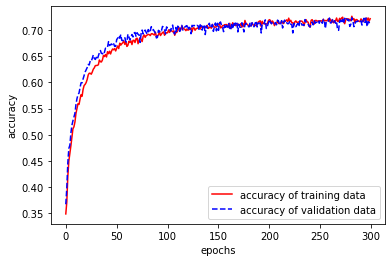

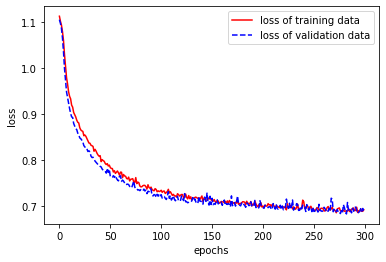

In [9]:
for obs in ('accuracy','loss'):
    plt.figure(figsize=(6,4))
    plt.plot(fit.history[obs],'r',
            label =obs+' of training data')
    
    #dashed line!!
    plt.plot(fit.history['val_'+obs],'b--',
            label =obs+' of validation data')
    
    plt.ylabel(obs)
    plt.xlabel('epochs')
    plt.legend()
    plt.show()

## 2 
By reducing the signal-to-noise ratio, namely the
amplitude of the external signal in the data (A) with
respect to the step typical size DX of the jump process,
check where the network (defined in the class) starts to
fail discriminating the categories.


In [10]:
#File importation
    
str1="ts_L60_Z12_A100_DX50_bias5_N10000"
str2="ts_L60_Z12_A1000_DX50_bias5_N10000"
str3="ts_L60_Z12_A10000_DX50_bias5_N10000"

fnamex1,fnamey1 ="DATA/x_" + str1 + ".csv","DATA/y_" + str1 + ".csv"
fnamex2,fnamey2 ="DATA/x_" + str2 + ".csv","DATA/y_" + str2 + ".csv"
fnamex3,fnamey3 ="DATA/x_" + str3 + ".csv","DATA/y_" + str3 + ".csv"

x1 = np.loadtxt(fnamex1,delimiter=',',dtype=float)
N1=len(x1)
x2 = np.loadtxt(fnamex2,delimiter=',',dtype=float)
N2=len(x2)
x3 = np.loadtxt(fnamex3,delimiter=',',dtype=float)
N3=len(x3)
 



categ1,N1_categ = np.loadtxt(fnamey1,delimiter=',', dtype=int),3
categ2,N2_categ = np.loadtxt(fnamey2,delimiter=',', dtype=int),3
categ3,N3_categ = np.loadtxt(fnamey3,delimiter=',', dtype=int),3

y1 = np.zeros((N1,N1_categ))
y2 = np.zeros((N2,N2_categ))
y3 = np.zeros((N3,N3_categ))

for n in range(N1):
    y1[n][categ1[n]] = 1
for n in range(N2):
    y2[n][categ2[n]] = 1
for n in range(N3):
    y3[n][categ3[n]] = 1
    

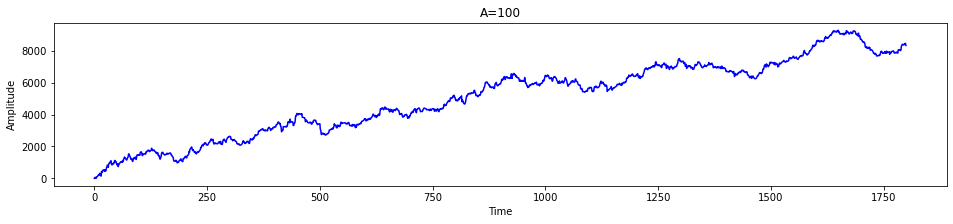

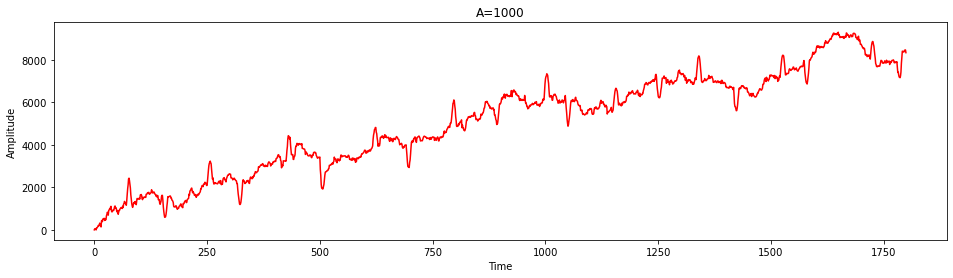

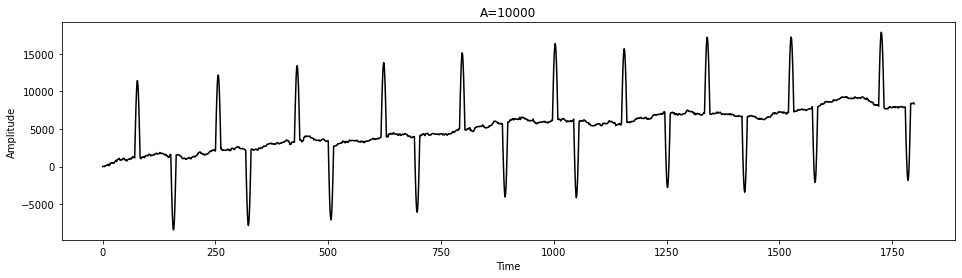

In [11]:

plt.figure(figsize=(16,3))
for j in range(30):
    plt.plot([i for i in range(j*len(x1[0]),(len(x1[0])+j*len(x1[0])))],x1[j],color='blue')
plt.title('A=100')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

plt.figure(figsize=(16,4))
for j in range(30):
    plt.plot([i for i in range(j*len(x1[0]),(len(x1[0])+j*len(x1[0])))],x2[j],color='red')
plt.title('A=1000')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

plt.figure(figsize=(16,4))
for j in range(30):
    plt.plot([i for i in range(j*len(x1[0]),(len(x1[0])+j*len(x1[0])))],x3[j],color='black')
plt.title('A=10000')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()


#Ploting all of them in the same figure doesn't look nice to show the general behaviour

In [12]:
#We asign the data for training and test
perc_train = 0.8
N1_train = int(N1 * perc_train)
N1_val=N1-N1_train
N2_train = int(N2 * perc_train)
N2_val =N2-N2_train
N3_train = int(N3 * perc_train)
N3_val =N3-N3_train

x1_train,y1_train  = x1[:N1_train],y1[:N1_train]
x2_train,y2_train  = x2[:N2_train],y2[:N2_train]
x3_train,y3_train  = x3[:N3_train],y3[:N3_train]

x1_val,y1_val = x1[N1_train:],y1[N1_train:]
x2_val,y2_val = x2[N2_train:],y2[N2_train:]
x3_val,y3_val = x3[N3_train:],y3[N3_train:]

L =len(x1[0])



In [13]:
x1_train = x1_train.reshape(x1_train.shape[0],L,1)
x1_val = x1_val.reshape(x1_val.shape[0],L,1)
x2_train = x2_train.reshape(x2_train.shape[0],L,1)
x2_val = x2_val.reshape(x2_val.shape[0],L,1)
x3_train = x3_train.reshape(x3_train.shape[0],L,1)
x3_val = x3_val.reshape(x3_val.shape[0],L,1)
input_shape = (L,1)

In [42]:
batch_size =250
epochs = 100

fit1 = model.fit(x1_train,y1_train,
               batch_size=batch_size,
               epochs = epochs,
               validation_data =(x1_val,y1_val),
               verbose=2, shuffle=True)

fit2 = model.fit(x2_train,y2_train,
               batch_size=batch_size,
               epochs = epochs,
               validation_data =(x2_val,y2_val),
               verbose=2, shuffle=True)

fit3 = model.fit(x3_train,y3_train,
               batch_size=batch_size,
               epochs = epochs,
               validation_data =(x3_val,y3_val),
               verbose=2, shuffle=True)

Epoch 1/100
32/32 - 1s - loss: 1.1058 - accuracy: 0.3334 - val_loss: 1.1058 - val_accuracy: 0.3335
Epoch 2/100
32/32 - 1s - loss: 1.1058 - accuracy: 0.3252 - val_loss: 1.1058 - val_accuracy: 0.3335
Epoch 3/100
32/32 - 1s - loss: 1.1058 - accuracy: 0.3245 - val_loss: 1.1058 - val_accuracy: 0.3335
Epoch 4/100
32/32 - 1s - loss: 1.1058 - accuracy: 0.3316 - val_loss: 1.1058 - val_accuracy: 0.3330
Epoch 5/100
32/32 - 2s - loss: 1.1058 - accuracy: 0.3221 - val_loss: 1.1058 - val_accuracy: 0.3335
Epoch 6/100
32/32 - 1s - loss: 1.1058 - accuracy: 0.3331 - val_loss: 1.1058 - val_accuracy: 0.3330
Epoch 7/100
32/32 - 1s - loss: 1.1058 - accuracy: 0.3239 - val_loss: 1.1058 - val_accuracy: 0.3330
Epoch 8/100
32/32 - 1s - loss: 1.1058 - accuracy: 0.3219 - val_loss: 1.1058 - val_accuracy: 0.3330
Epoch 9/100
32/32 - 2s - loss: 1.1058 - accuracy: 0.3334 - val_loss: 1.1058 - val_accuracy: 0.3330
Epoch 10/100
32/32 - 2s - loss: 1.1058 - accuracy: 0.3279 - val_loss: 1.1058 - val_accuracy: 0.3330
Epoch 11/

32/32 - 1s - loss: 1.1058 - accuracy: 0.3235 - val_loss: 1.1058 - val_accuracy: 0.3335
Epoch 84/100
32/32 - 1s - loss: 1.1058 - accuracy: 0.3284 - val_loss: 1.1058 - val_accuracy: 0.3330
Epoch 85/100
32/32 - 1s - loss: 1.1058 - accuracy: 0.3265 - val_loss: 1.1058 - val_accuracy: 0.3335
Epoch 86/100
32/32 - 2s - loss: 1.1058 - accuracy: 0.3289 - val_loss: 1.1058 - val_accuracy: 0.3335
Epoch 87/100
32/32 - 1s - loss: 1.1058 - accuracy: 0.3274 - val_loss: 1.1058 - val_accuracy: 0.3335
Epoch 88/100
32/32 - 1s - loss: 1.1058 - accuracy: 0.3339 - val_loss: 1.1058 - val_accuracy: 0.3335
Epoch 89/100
32/32 - 1s - loss: 1.1058 - accuracy: 0.3275 - val_loss: 1.1058 - val_accuracy: 0.3335
Epoch 90/100
32/32 - 1s - loss: 1.1058 - accuracy: 0.3320 - val_loss: 1.1058 - val_accuracy: 0.3335
Epoch 91/100
32/32 - 1s - loss: 1.1058 - accuracy: 0.3291 - val_loss: 1.1058 - val_accuracy: 0.3335
Epoch 92/100
32/32 - 1s - loss: 1.1058 - accuracy: 0.3331 - val_loss: 1.1058 - val_accuracy: 0.3330
Epoch 93/100


Epoch 66/100
32/32 - 1s - loss: 1.1058 - accuracy: 0.3293 - val_loss: 1.1058 - val_accuracy: 0.3335
Epoch 67/100
32/32 - 1s - loss: 1.1058 - accuracy: 0.3280 - val_loss: 1.1058 - val_accuracy: 0.3335
Epoch 68/100
32/32 - 2s - loss: 1.1058 - accuracy: 0.3285 - val_loss: 1.1058 - val_accuracy: 0.3335
Epoch 69/100
32/32 - 2s - loss: 1.1058 - accuracy: 0.3288 - val_loss: 1.1058 - val_accuracy: 0.3330
Epoch 70/100
32/32 - 1s - loss: 1.1058 - accuracy: 0.3204 - val_loss: 1.1058 - val_accuracy: 0.3335
Epoch 71/100
32/32 - 1s - loss: 1.1058 - accuracy: 0.3271 - val_loss: 1.1058 - val_accuracy: 0.3330
Epoch 72/100
32/32 - 1s - loss: 1.1058 - accuracy: 0.3215 - val_loss: 1.1058 - val_accuracy: 0.3335
Epoch 73/100
32/32 - 1s - loss: 1.1058 - accuracy: 0.3334 - val_loss: 1.1058 - val_accuracy: 0.3335
Epoch 74/100
32/32 - 1s - loss: 1.1058 - accuracy: 0.3189 - val_loss: 1.1058 - val_accuracy: 0.3335
Epoch 75/100
32/32 - 1s - loss: 1.1058 - accuracy: 0.3217 - val_loss: 1.1058 - val_accuracy: 0.3335


32/32 - 1s - loss: 1.1054 - accuracy: 0.3311 - val_loss: 1.1058 - val_accuracy: 0.3335
Epoch 49/100
32/32 - 1s - loss: 1.1054 - accuracy: 0.3307 - val_loss: 1.1058 - val_accuracy: 0.3330
Epoch 50/100
32/32 - 1s - loss: 1.1054 - accuracy: 0.3281 - val_loss: 1.1058 - val_accuracy: 0.3335
Epoch 51/100
32/32 - 1s - loss: 1.1054 - accuracy: 0.3234 - val_loss: 1.1058 - val_accuracy: 0.3335
Epoch 52/100
32/32 - 1s - loss: 1.1054 - accuracy: 0.3290 - val_loss: 1.1058 - val_accuracy: 0.3335
Epoch 53/100
32/32 - 1s - loss: 1.1054 - accuracy: 0.3280 - val_loss: 1.1058 - val_accuracy: 0.3330
Epoch 54/100
32/32 - 1s - loss: 1.1054 - accuracy: 0.3286 - val_loss: 1.1058 - val_accuracy: 0.3335
Epoch 55/100
32/32 - 2s - loss: 1.1055 - accuracy: 0.3245 - val_loss: 1.1058 - val_accuracy: 0.3335
Epoch 56/100
32/32 - 1s - loss: 1.1054 - accuracy: 0.3316 - val_loss: 1.1058 - val_accuracy: 0.3330
Epoch 57/100
32/32 - 2s - loss: 1.1054 - accuracy: 0.3338 - val_loss: 1.1058 - val_accuracy: 0.3330
Epoch 58/100


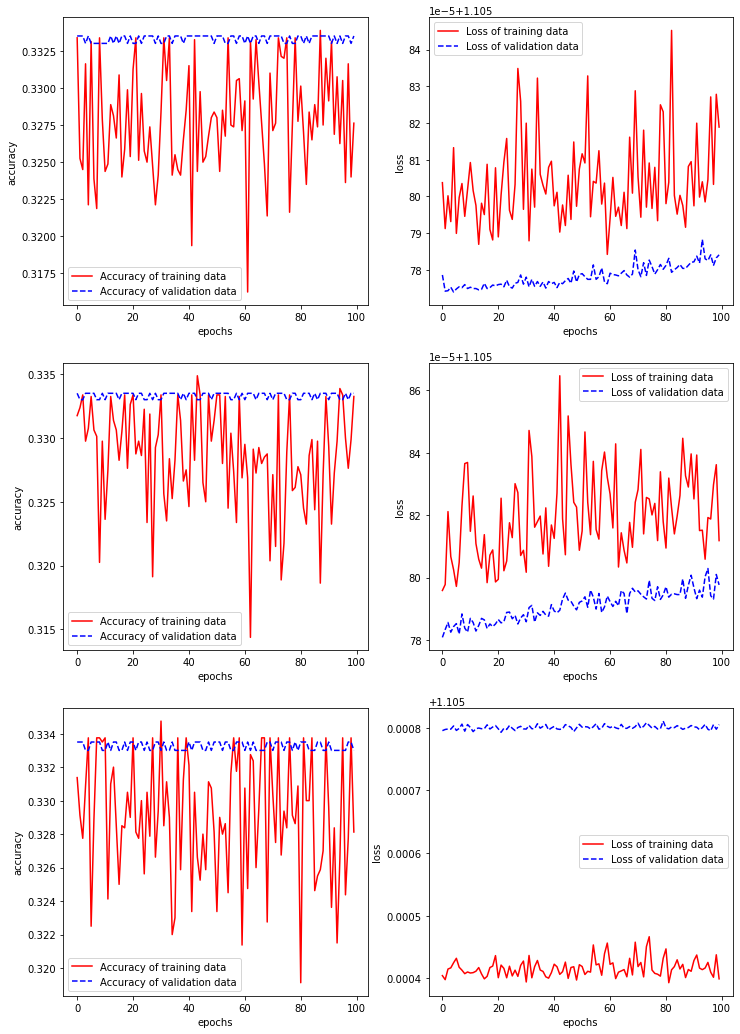

In [43]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(12, 18))
ax1.plot(fit1.history['accuracy'],'r', label ='Accuracy of training data')
ax1.plot(fit1.history['val_accuracy'],'b--', label ='Accuracy of validation data')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epochs')
ax1.legend()

ax2.plot(fit1.history['loss'],'r',label ='Loss of training data')
ax2.plot(fit1.history['val_loss'],'b--', label ='Loss of validation data')
ax2.set_ylabel('loss')
ax2.set_xlabel('epochs')
ax2.legend()
#fig1.show()



#fig2, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
ax3.plot(fit2.history['accuracy'],'r', label ='Accuracy of training data')
ax3.plot(fit2.history['val_accuracy'],'b--', label ='Accuracy of validation data')
ax3.set_ylabel('accuracy')
ax3.set_xlabel('epochs')
ax3.legend()

ax4.plot(fit2.history['loss'],'r',label ='Loss of training data')
ax4.plot(fit2.history['val_loss'],'b--', label ='Loss of validation data')
ax4.set_ylabel('loss')
ax4.set_xlabel('epochs')
ax4.legend()
#fig2.show()




#fig3, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
ax5.plot(fit3.history['accuracy'],'r', label ='Accuracy of training data')
ax5.plot(fit3.history['val_accuracy'],'b--', label ='Accuracy of validation data')
ax5.set_ylabel('accuracy')
ax5.set_xlabel('epochs')
ax5.legend()

ax6.plot(fit3.history['loss'],'r',label ='Loss of training data')
ax6.plot(fit3.history['val_loss'],'b--', label ='Loss of validation data')
ax6.set_ylabel('loss')
ax6.set_xlabel('epochs')
ax6.legend()
plt.show()